chatbot with RASA:

Here a simple chatbot with the ``rasa`` python module is shown. The code is based on this [example](https://rasa.com/docs/rasa/jupyter-notebooks/).

more about Rasa on github:
[RasaHQ](https://github.com/RasaHQ/rasa-demo)

In [ ]:
# add additional modules
#
!pip3 install rasa

     |████████████████████████████████| 696kB 22.0MB/s 
     |████████████████████████████████| 133kB 62.2MB/s 
     |████████████████████████████████| 3.0MB 57.3MB/s 
     |████████████████████████████████| 81kB 14.2MB/s 
     |████████████████████████████████| 307kB 48.0MB/s 
     |████████████████████████████████| 61kB 11.2MB/s 
     |████████████████████████████████| 51kB 9.6MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 460kB 51.8MB/s 
     |████████████████████████████████| 184kB 60.8MB/s 
     |████████████████████████████████| 122kB 63.4MB/s 
     |████████████████████████████████| 512kB 57.0MB/s 
     |████████████████████████████████| 4.3MB 56.8MB/s 
     |████████████████████████████████| 460kB 59.6MB/s 
     |████████████████████████████████| 61kB 11.1MB/s 
     |████████████████████████████████| 153kB 60.2MB/s 
     |████████████████████████████████| 348kB 53.1MB/s 
     |████████████████████████████████| 81kB 13.8MB/s 


In [ ]:
!pip install -U ipython

     |████████████████████████████████| 788kB 15.7MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 2.0.10 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [ ]:
import nest_asyncio

nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


In [ ]:
from rasa.cli.scaffold import create_initial_project
import os

project = "test-project"
create_initial_project(project)

# move into project directory and show files
os.chdir('/content/test-project/')
print(os.listdir("."))

['credentials.yml', 'actions', 'config.yml', 'domain.yml', 'endpoints.yml', 'data', 'tests']


In [ ]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


In [ ]:
import rasa

model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

The configuration for pipeline and policies was chosen automatically. It was written into the config file at 'config.yml'.
(0lqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqk(B
(0x(B Rasa Open Source reports anonymous usage telemetry to help improve the product (0x(B
(0x(B for all its users.                                                             (0x(B
(0x(B                                                                                (0x(B
(0x(B If you'd like to opt-out, you can use `rasa telemetry disable`.                (0x(B
(0x(B To learn more, check out https://rasa.com/docs/rasa/telemetry/telemetry.       (0x(B
(0mqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqj(B
Training NLU model...


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/rasa/utils/tensorflow/model_data.py:861: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.concatenate(np.array(f)),
Epochs: 100%|██████████| 100/100 [00:08<00:00, 12.35it/s, t_loss=1.416, i_acc=0.986]


NLU model training completed.
Training Core model...


Processed trackers: 100%|██████████| 3/3 [00:00<00:00, 144.85it/s, # actions=12]
Processed actions: 12it [00:00, 1328.05it/s, # examples=12]
Processed trackers: 100%|██████████| 120/120 [00:02<00:00, 40.95it/s, # actions=30]
/usr/local/lib/python3.6/dist-packages/rasa/utils/tensorflow/model_data_utils.py:338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(values), number_of_dimensions=4
/usr/local/lib/python3.6/dist-packages/rasa/utils/tensorflow/model_data_utils.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  MASK: [FeatureArray(np.array

Core model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20210202-211140.tar.gz'.
TrainingResult(model='models/20210202-211140.tar.gz', code=0)


In [ ]:
os.chdir('models/')
model_name = os.listdir()
os.chdir('../../')

In [ ]:
from rasa.jupyter import chat

endpoints = "endpoints.yml"
model_path = "test-project/models/" + model_name[0]
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
Hi
Hey! How are you?
fine
Great, carry on!
OK
Great, carry on!
/stop


In [ ]:
import rasa.shared.data as data
#
nlu_data_directory = data.get_data_files('/content/test-project', rasa.shared.data.is_nlu_file)
stories_directory = data.get_data_files('/content/test-project', rasa.shared.data.is_story_file)
print(stories_directory, nlu_data_directory)

['/content/test-project/data/rules.yml', '/content/test-project/data/stories.yml', '/content/test-project/tests/test_stories.yml'] ['/content/test-project/data/nlu.yml', '/content/test-project/domain.yml']


100%|██████████| 69/69 [00:00<00:00, 102.80it/s]


Done testing.


<Figure size 1440x1440 with 0 Axes>

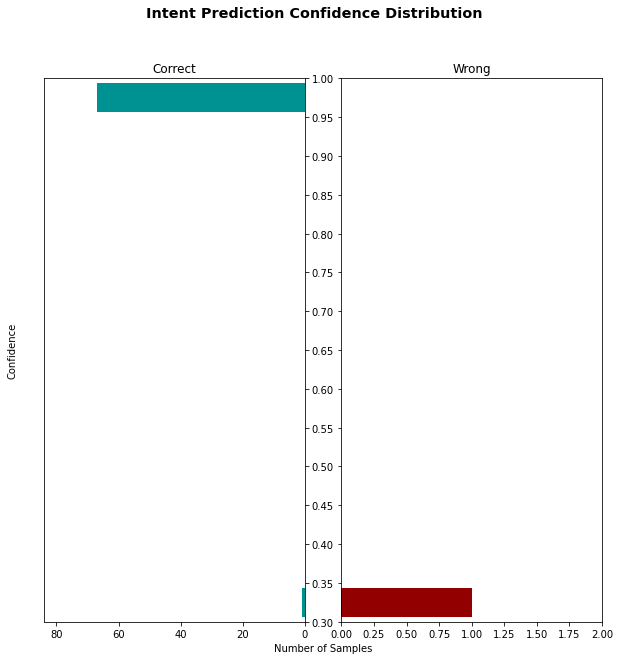

In [ ]:
rasa.test(model_path, stories_directory[1], nlu_data_directory[0])
print("Done testing.")

In [ ]:
if os.path.isfile("errors.json"):
    print("NLU Errors:")
    print(open("errors.json").read())
else:
    print("No NLU errors.")

if os.path.isdir("results"):
      print("\n")
      print("Core Errors:")
      print(open("results/failed_test_stories.yml").read())

No NLU errors.


Core Errors:
# None of the test stories failed - all good!


Copyright © 2021 IUBH Internationale Hochschule